# Домашнее задание 3

In [232]:
# импортируем библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import (GaussianNB, MultinomialNB, BernoulliNB)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, roc_curve, auc)
from sklearn.preprocessing import StandardScaler


## 1. Взять за основу датасет Heart Disease UCI из ДЗ 2

In [233]:
# загружаем данные
data = pd.read_csv('../Homework 2/Datasets/data.csv')
# убираем данные с пропусками
data.dropna(inplace=True)
print(f'Удалено строк: {303 - data.shape[0]}')

Удалено строк: 6


In [234]:
# Преобразуем целевую переменную
y = np.where(data['num'] > 0, 1, 0)
X = data.drop('num', axis=1)

print(f'Здоровых пациентов: {np.sum(y == 0)}')
print(f'Больных пациентов: {np.sum(y == 1)}')

print(f'\nПризнаки: {list(X.columns)}')
print(f'Всего признаков: {X.shape[1]}')

Здоровых пациентов: 160
Больных пациентов: 137

Признаки: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
Всего признаков: 13


### Примечание
Диагноз ишемической болезни сердца (статус по ангиографии)
Диагноз ишемической болезни сердца по ангиографическому статусу классифицируется как отсутствие значимого стеноза при значении 0 (< 50% сужения диаметра) и значимый стеноз при значении 1 (> 50% сужения диаметра) в любой из основных коронарных артерий (атрибуты 59–68).

Классификация значимости стеноза
Значение 0: Сужение диаметра < 50% — не значимый стеноз, соответствует minor CAD или интимальному поражению без клинической значимости.

Значение 1: Сужение диаметра > 50% — значимый стеноз, определяет наличие коронарной патологии, часто требует вмешательства; стандарт в UCI Heart Disease dataset.

Эта бинарная шкала широко используется в кардиологии для оценки тяжести по КАГ, где >50% — порог для обструктивного CAD.

## 2. Загрузить данные, разделить их на обучающую и тестовую выборки

In [235]:
# разделяем данные на обучающую (80%) и тестовую (20%) выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f'Форма обучающей выборки: {X_train.shape}')
print(f'Форма тестовой выборки: {X_test.shape}')
print(f'\nОбучающая выборка:')
print(f'\tЗдоровые: {np.sum(y_train == 0)} ({np.sum(y_train == 0)/len(y_train)*100:.1f}%)')
print(f'\tБольные: {np.sum(y_train == 1)} ({np.sum(y_train == 1)/len(y_train)*100:.1f}%)')
print(f'\nТестовая выборка:')
print(f'\tЗдоровые: {np.sum(y_test == 0)} ({np.sum(y_test == 0)/len(y_test)*100:.1f}%)')
print(f'\tБольные: {np.sum(y_test == 1)} ({np.sum(y_test == 1)/len(y_test)*100:.1f}%)')

Форма обучающей выборки: (237, 13)
Форма тестовой выборки: (60, 13)

Обучающая выборка:
	Здоровые: 128 (54.0%)
	Больные: 109 (46.0%)

Тестовая выборка:
	Здоровые: 32 (53.3%)
	Больные: 28 (46.7%)


### 2.1. Балансировка обучающей выборки

#### 2.1.1. Применение SMOTE

In [236]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)


#### 2.1.2. Применение 

#### 2.1.! Вывод результата балансировки

In [237]:
print(f'Форма обучающей выборки: {X_train.shape}')
print(f'Форма тестовой выборки: {X_test.shape}')
print(f'\nОбучающая выборка:')
print(f'\tЗдоровые: {np.sum(y_train == 0)} ({np.sum(y_train == 0)/len(y_train)*100:.1f}%)')
print(f'\tБольные: {np.sum(y_train == 1)} ({np.sum(y_train == 1)/len(y_train)*100:.1f}%)')
print(f'\nТестовая выборка:')
print(f'\tЗдоровые: {np.sum(y_test == 0)} ({np.sum(y_test == 0)/len(y_test)*100:.1f}%)')
print(f'\tБольные: {np.sum(y_test == 1)} ({np.sum(y_test == 1)/len(y_test)*100:.1f}%)')

Форма обучающей выборки: (256, 13)
Форма тестовой выборки: (60, 13)

Обучающая выборка:
	Здоровые: 128 (50.0%)
	Больные: 128 (50.0%)

Тестовая выборка:
	Здоровые: 32 (53.3%)
	Больные: 28 (46.7%)


### 2.2. Стандартизация признаков

In [238]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('Стандартизация признаков с помощью StandardScaler')
print(f'Среднее значение после масштабирования: {X_train_scaled.mean():.2e}')
print(f'Стандартное отклонение: {X_train_scaled.std():.4f}')

Стандартизация признаков с помощью StandardScaler
Среднее значение после масштабирования: -1.23e-17
Стандартное отклонение: 1.0000


## 3. Обучить модели наивного байесовского классификатора, логистической регрессии и k-ближайших соседей (выявить k с наилучшим результатом, например, путем перебора результатов, получаемых для классификаторов с разными значениями k)

In [239]:
# 1. Наивный байесовский классификатор
nb_model = [GaussianNB(),MultinomialNB(),BernoulliNB()]
nb_model[2].fit(X_train_scaled, y_train)
y_pred_nb = nb_model[2].predict(X_test_scaled)
y_pred_proba_nb = nb_model[2].predict_proba(X_test_scaled)[:, 1]
print(f'\t✓ Модель {nb_model[2]} наивного байесовского классификатора обучена')


	✓ Модель BernoulliNB() наивного байесовского классификатора обучена


In [240]:
# 2. Логистическая регрессия
lr_model = LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]
print('\t✓ Модель логистической регрессии обучена')

	✓ Модель логистической регрессии обучена


In [241]:
# 3. K-ближайших соседей

print('   Поиск оптимального k (1-20)...')

k_values = range(1, 21)
accuracies_knn = []
knn_models = {}

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred_temp = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred_temp)
    accuracies_knn.append(acc)
    knn_models[k] = knn

best_k = k_values[np.argmax(accuracies_knn)]
best_accuracy_knn = max(accuracies_knn)

print(f'   Лучшее значение k: {best_k}')
print(f'   Accuracy при k={best_k}: {best_accuracy_knn:.4f}')

knn_model = knn_models[best_k]
y_pred_knn = knn_model.predict(X_test_scaled)
y_pred_proba_knn = knn_model.predict_proba(X_test_scaled)[:, 1]
print('\t✓ Модель k-ближайших соседей обучена')

   Поиск оптимального k (1-20)...
   Лучшее значение k: 3
   Accuracy при k=3: 0.8833
	✓ Модель k-ближайших соседей обучена


## 4. Построить матрицу ошибок, оценить модель с помощью accuracy, precision, recall и F1-score

In [242]:
def evaluate_model(y_test, y_pred, model_name):
    '''Функция для оценки модели и вывода метрик'''
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    print(f'\n{model_name}')
    print(f'Accuracy:  {accuracy:.4f}  (доля правильных предсказаний)')
    print(f'Precision: {precision:.4f}  (доля верных положительных прогнозов)')
    print(f'Recall:    {recall:.4f}  (доля найденных больных)')
    print(f'F1-Score:  {f1:.4f}  (среднее гармоническое P и R)')
    print(f'Матрица ошибок:')
    print(cm)
    print(f'TN={cm[0,0]} (верно отрицательные)  FP={cm[0,1]} (ложно положительные)')
    print(f'FN={cm[1,0]} (ложно отрицательные) TP={cm[1,1]} (верно положительные)')
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'cm': cm
    }


print('ОЦЕНКА МОДЕЛЕЙ')

metrics_nb = evaluate_model(y_test, y_pred_nb,'НАИВНЫЙ БАЙЕСОВСКИЙ КЛАССИФИКАТОР')
metrics_lr = evaluate_model(y_test, y_pred_lr,'ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ')
metrics_knn = evaluate_model(y_test, y_pred_knn,f'K-БЛИЖАЙШИХ СОСЕДЕЙ (k={best_k})')

ОЦЕНКА МОДЕЛЕЙ

НАИВНЫЙ БАЙЕСОВСКИЙ КЛАССИФИКАТОР
Accuracy:  0.8667  (доля правильных предсказаний)
Precision: 0.9167  (доля верных положительных прогнозов)
Recall:    0.7857  (доля найденных больных)
F1-Score:  0.8462  (среднее гармоническое P и R)
Матрица ошибок:
[[30  2]
 [ 6 22]]
TN=30 (верно отрицательные)  FP=2 (ложно положительные)
FN=6 (ложно отрицательные) TP=22 (верно положительные)

ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ
Accuracy:  0.8333  (доля правильных предсказаний)
Precision: 0.8462  (доля верных положительных прогнозов)
Recall:    0.7857  (доля найденных больных)
F1-Score:  0.8148  (среднее гармоническое P и R)
Матрица ошибок:
[[28  4]
 [ 6 22]]
TN=28 (верно отрицательные)  FP=4 (ложно положительные)
FN=6 (ложно отрицательные) TP=22 (верно положительные)

K-БЛИЖАЙШИХ СОСЕДЕЙ (k=3)
Accuracy:  0.8833  (доля правильных предсказаний)
Precision: 0.8621  (доля верных положительных прогнозов)
Recall:    0.8929  (доля найденных больных)
F1-Score:  0.8772  (среднее гармоническое P и R)
Матриц

## 5. Провести ROC-анализ обученных классификаторов

In [243]:
# Вычисляем ROC-кривые
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_proba_nb)
auc_nb = auc(fpr_nb, tpr_nb)

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
auc_lr = auc(fpr_lr, tpr_lr)

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_proba_knn)
auc_knn = auc(fpr_knn, tpr_knn)

print('ROC-АНАЛИЗ')
print(f'\nПлощадь под ROC-кривой (AUC-ROC):')
print(f'  Наивный Байес:       {auc_nb:.4f}')
print(f'  Логистическая регр.: {auc_lr:.4f}')
print(f'  K-ближайшие соседи:  {auc_knn:.4f}')
print(f'\nИнтерпретация AUC:')
print(f'  1.0 = идеальный классификатор')
print(f'  0.5 = случайный классификатор')
print(f'  < 0.5 = хуже случайного')

ROC-АНАЛИЗ

Площадь под ROC-кривой (AUC-ROC):
  Наивный Байес:       0.9448
  Логистическая регр.: 0.9520
  K-ближайшие соседи:  0.9219

Интерпретация AUC:
  1.0 = идеальный классификатор
  0.5 = случайный классификатор
  < 0.5 = хуже случайного


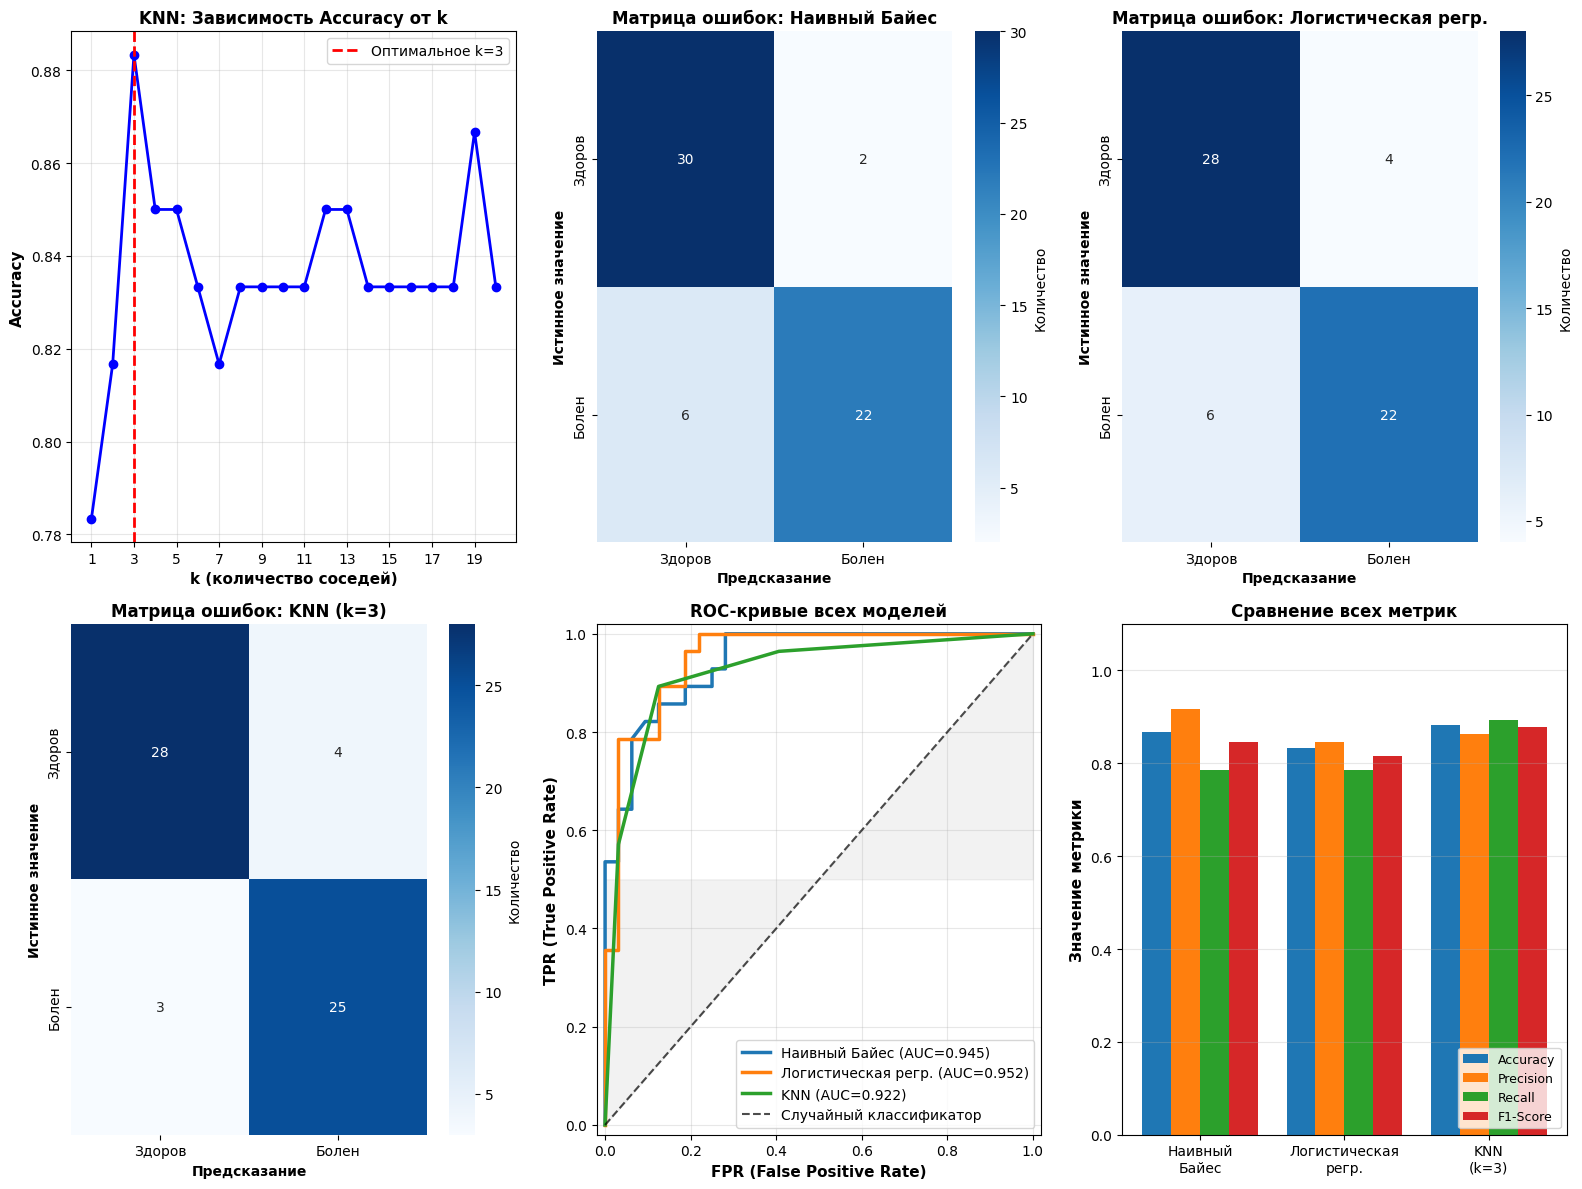

In [244]:
# Создаем комплексную визуализацию
fig = plt.figure(figsize=(16, 12))

# График 1: Поиск оптимального k для KNN
ax1 = plt.subplot(2, 3, 1)
ax1.plot(k_values, accuracies_knn, 'b-o', linewidth=2, markersize=6)
ax1.axvline(best_k, color='r', linestyle='--', linewidth=2, 
           label=f'Оптимальное k={best_k}')
ax1.set_xlabel('k (количество соседей)', fontsize=11, fontweight='bold')
ax1.set_ylabel('Accuracy', fontsize=11, fontweight='bold')
ax1.set_title('KNN: Зависимость Accuracy от k', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=10)
ax1.set_xticks(range(1, 21, 2))

# График 2: Матрица ошибок - Наивный Байес
ax2 = plt.subplot(2, 3, 2)
sns.heatmap(metrics_nb['cm'], annot=True, fmt='d', cmap='Blues', ax=ax2, 
           cbar_kws={'label': 'Количество'})
ax2.set_title('Матрица ошибок: Наивный Байес', fontsize=12, fontweight='bold')
ax2.set_ylabel('Истинное значение', fontweight='bold')
ax2.set_xlabel('Предсказание', fontweight='bold')
ax2.set_xticklabels(['Здоров', 'Болен'])
ax2.set_yticklabels(['Здоров', 'Болен'])

# График 3: Матрица ошибок - Логистическая регрессия
ax3 = plt.subplot(2, 3, 3)
sns.heatmap(metrics_lr['cm'], annot=True, fmt='d', cmap='Blues', ax=ax3,
           cbar_kws={'label': 'Количество'})
ax3.set_title('Матрица ошибок: Логистическая регр.', fontsize=12, fontweight='bold')
ax3.set_ylabel('Истинное значение', fontweight='bold')
ax3.set_xlabel('Предсказание', fontweight='bold')
ax3.set_xticklabels(['Здоров', 'Болен'])
ax3.set_yticklabels(['Здоров', 'Болен'])

# График 4: Матрица ошибок - KNN
ax4 = plt.subplot(2, 3, 4)
sns.heatmap(metrics_knn['cm'], annot=True, fmt='d', cmap='Blues', ax=ax4,
           cbar_kws={'label': 'Количество'})
ax4.set_title(f'Матрица ошибок: KNN (k={best_k})', fontsize=12, fontweight='bold')
ax4.set_ylabel('Истинное значение', fontweight='bold')
ax4.set_xlabel('Предсказание', fontweight='bold')
ax4.set_xticklabels(['Здоров', 'Болен'])
ax4.set_yticklabels(['Здоров', 'Болен'])

# График 5: ROC-кривые
ax5 = plt.subplot(2, 3, 5)
ax5.plot(fpr_nb, tpr_nb, label=f'Наивный Байес (AUC={auc_nb:.3f})', 
        linewidth=2.5, color='#1f77b4')
ax5.plot(fpr_lr, tpr_lr, label=f'Логистическая регр. (AUC={auc_lr:.3f})', 
        linewidth=2.5, color='#ff7f0e')
ax5.plot(fpr_knn, tpr_knn, label=f'KNN (AUC={auc_knn:.3f})', 
        linewidth=2.5, color='#2ca02c')
ax5.plot([0, 1], [0, 1], 'k--', label='Случайный классификатор', 
        linewidth=1.5, alpha=0.7)
ax5.fill_between([0, 1], [0, 1], 0.5, alpha=0.1, color='gray')
ax5.set_xlabel('FPR (False Positive Rate)', fontsize=11, fontweight='bold')
ax5.set_ylabel('TPR (True Positive Rate)', fontsize=11, fontweight='bold')
ax5.set_title('ROC-кривые всех моделей', fontsize=12, fontweight='bold')
ax5.legend(loc='lower right', fontsize=10)
ax5.grid(True, alpha=0.3)
ax5.set_xlim([-0.02, 1.02])
ax5.set_ylim([-0.02, 1.02])

# График 6: Сравнение метрик
ax6 = plt.subplot(2, 3, 6)
models_names = ['Наивный\nБайес', 'Логистическая\nрегр.', f'KNN\n(k={best_k})']
x_pos = np.arange(len(models_names))
width = 0.2

accuracies = [metrics_nb['accuracy'], metrics_lr['accuracy'], metrics_knn['accuracy']]
precisions = [metrics_nb['precision'], metrics_lr['precision'], metrics_knn['precision']]
recalls = [metrics_nb['recall'], metrics_lr['recall'], metrics_knn['recall']]
f1_scores = [metrics_nb['f1'], metrics_lr['f1'], metrics_knn['f1']]

ax6.bar(x_pos - 1.5*width, accuracies, width, label='Accuracy', color='#1f77b4')
ax6.bar(x_pos - 0.5*width, precisions, width, label='Precision', color='#ff7f0e')
ax6.bar(x_pos + 0.5*width, recalls, width, label='Recall', color='#2ca02c')
ax6.bar(x_pos + 1.5*width, f1_scores, width, label='F1-Score', color='#d62728')

ax6.set_ylabel('Значение метрики', fontsize=11, fontweight='bold')
ax6.set_title('Сравнение всех метрик', fontsize=12, fontweight='bold')
ax6.set_xticks(x_pos)
ax6.set_xticklabels(models_names, fontsize=10)
ax6.legend(loc='lower right', fontsize=9)
ax6.grid(True, alpha=0.3, axis='y')
ax6.set_ylim([0, 1.1])

plt.tight_layout()
plt.show()
